# Generation of single VGB TDI 

In this notebook, we generate noise free TDI for each of the verification galactic binary of sangria data. 
We use TDI generation 1.5, time sampling of dt=15s and duration of 10000s. 

The time range can be adjusted below. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

### 1. Get the source parameters

In [2]:
#!wget https://lisa-ldc.lal.in2p3.fr/media/uploads/LDC2_spritz_vgb_training_v1_uViCysf.h5 -o LDC2_spritz_vgb_training_v1.h5
training_file = "LDC2_spritz_vgb_training_v1.h5"
fid = h5py.File(training_file)
names = fid["sky/cat"].dtype.names
pGB = dict(zip(names, [fid["sky/cat"][name] for name in names]))
pGB = np.rec.fromarrays(pGB.values(), names=list(pGB.keys()))

### 2. Install the LDC

Install the LDC toolbox: 

```
git clone -b develop git@gitlab.in2p3.fr:LISA/LDC.git
python setup.py install 
```

LDC documentation can be found [here](https://lisa.pages.in2p3.fr/LDC/). 
Installation instructions are given in the README file. 

### Compute strain with the LDC

In [3]:
from ldc.lisa.orbits import Orbits
from ldc.lisa.projection import ProjectedStrain
from ldc.waveform.waveform import HpHc

dt = 15
t_min = 0
t_max = 10000#31536000 # in sec
t = np.arange(t_min, t_max, dt)
orbits = Orbits.type(dict({'orbit_type':'analytic', 'nominal_arm_length':2.5e9, 
                           "initial_position": 0, "initial_rotation": 0}))

P = ProjectedStrain(orbits)    
hphc = HpHc.type("test", "GB", "TD_fdot")

In [4]:
reduced_p = ["Amplitude", "Frequency", "FrequencyDerivative", "Inclination", "EclipticLatitude", 
            "EclipticLongitude", "InitialPhase", "Polarization"]
for gb in pGB:
    name = gb['Name'][0].decode()
    print(name)
    params = dict(zip(reduced_p, [float(gb[p]) for p in reduced_p]))
    hphc.set_param(params)
    gwr = P.arm_response(t_min, t_max, dt, [hphc])
    X, Y, Z = P.compute_tdi_x(t) , P.compute_tdi_y(t), P.compute_tdi_z(t)
    np.save(f"VGB_{name}_XYZ.npy", np.rec.fromarrays([t,X,Y,Z], names=['t', 'X', 'Y', 'Z']))

HPLib
ZTFJ2320
SDSSJ0923
AMCVn
CX1751
ZTFJ2029
SDSSJ0935
ZTFJ1539
SDSSJ2322
4U1820-30
HMCnc
CRBoo
PTFJ0533
HD265435
CDm30
ZTFJ0640
ZTFJ1749
SMSSJ0338
SDSSJ1630
ZTFJ2055
ZTFJ1901
ZTFJ1946
ESCet
SDSSJ1337
ZTFJ2130
V407Vul
ZTFJ2243
SDSSJ0634
ZTFJ0722
PTF1919
V803Cen
SDSSJ1351
SDSSJ1235
ZTFJ0538
SDSSJ0651
SDSSJ1908


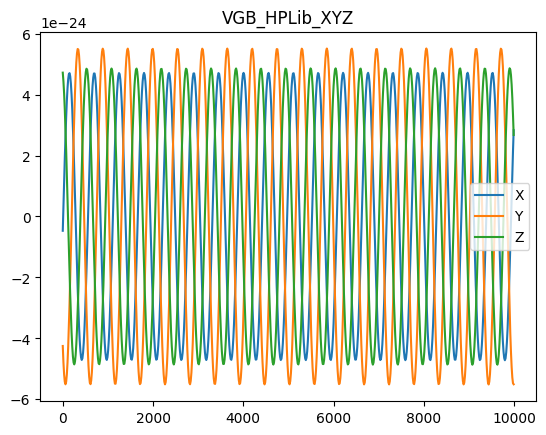

In [5]:
TDI = np.load("VGB_HPLib_XYZ.npy")
plt.figure()
plt.title("VGB_HPLib_XYZ")
plt.plot(TDI["t"], TDI["X"], label="X")
plt.plot(TDI["t"], TDI["Y"], label="Y")
plt.plot(TDI["t"], TDI["Z"], label="Z")
plt.legend()